# **Step 1: Import all necessary libraries, reading and understanding data**


In [1]:
# Import all necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor




### Data Reading,Understanding and Preparation


In [2]:
# Reading and Understanding data

bikeset = pd.read_csv('day.csv')
bikeset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Checking the shape of the dataset
bikeset.shape

(730, 16)

In [4]:
#Checking the info of dataset
bikeset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### From the above info() function,we can conclude that there are no null values in any of the columns in data set

In [5]:
#Checking dataset description of the dataset
bikeset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# checking for null values

bikeset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Handling Irrelevant columns

irr_bike = bikeset[['casual','registered','cnt']]
irr_bike.corr()

,casual,registered,cnt
casual,1.000000,0.394137,0.672123
registered,0.394137,1.000000,0.945411
cnt,0.672123,0.945411,1.000000


cnt = casual + registered .
We can drop off casual and registered columns for further analysis.  

In [8]:
#Dropping irrelevant columns from the dataset
#Column instant and dteday are irrelevant and not needed for model building so dropping
bikeset.drop(['instant','dteday','casual','registered'], axis = 1, inplace=True)

bikeset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# **Step 2: Preparing data for modeling**

# Common functions

In [9]:
#mapping categorical variables with their subcategories to help with visualization analysis 
def map_season(x):
  return x.map({1:'Spring' , 2:'Summer' ,3:'Fall' , 4:'Winter' })

def weathersit_map(x):
  return x.map({1:'Clear' , 2:'Misty' ,3:'Light snow_rain' , 4:'Heavy snow_rain' })

def weekday_map(x):
  return x.map({0: 'sun',1:'mon' , 2:'tues' ,3:'wed' , 4:'thurs', 5: 'fri', 6: 'sat' })

def month_map(x):
  return  x.map({1:'jan' , 2:'feb' ,3:'mar' , 4:'apr', 5: 'may', 6: 'jun',7: 'jul',8: 'aug',9: 'sep',10: 'oct',11: 'nov',12: 'dec'})

def plot_categorical_vars(cat_vars , dep_var):
  plt.figure(figsize=(25,16))
  for i in range(0, len(cat_vars)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x= cat_vars[i], y= dep_var, data = bikeset)
  plt.show()

def analyse_cat_vars(cat_col,x,y):
    plt.figure(figsize=(x,y))
    plt.subplot(1,2,1)
    sns.barplot(data=bikeset, x=cat_col, y='cnt')
    plt.subplot(1,2,2)
    sns.barplot(x=cat_col,y='cnt', data= bikeset, hue='yr')
    plt.show()
    return


In [10]:
#mapping categorical variables with their subcategories to help with visualization analysis 
bikeset[['season']] = bikeset[['season']].apply(map_season)
bikeset[['weathersit']] = bikeset[['weathersit']].apply(weathersit_map)
bikeset[['weekday']] = bikeset[['weekday']].apply(weekday_map)
bikeset[['mnth']] = bikeset[['mnth']].apply(month_map)
bikeset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


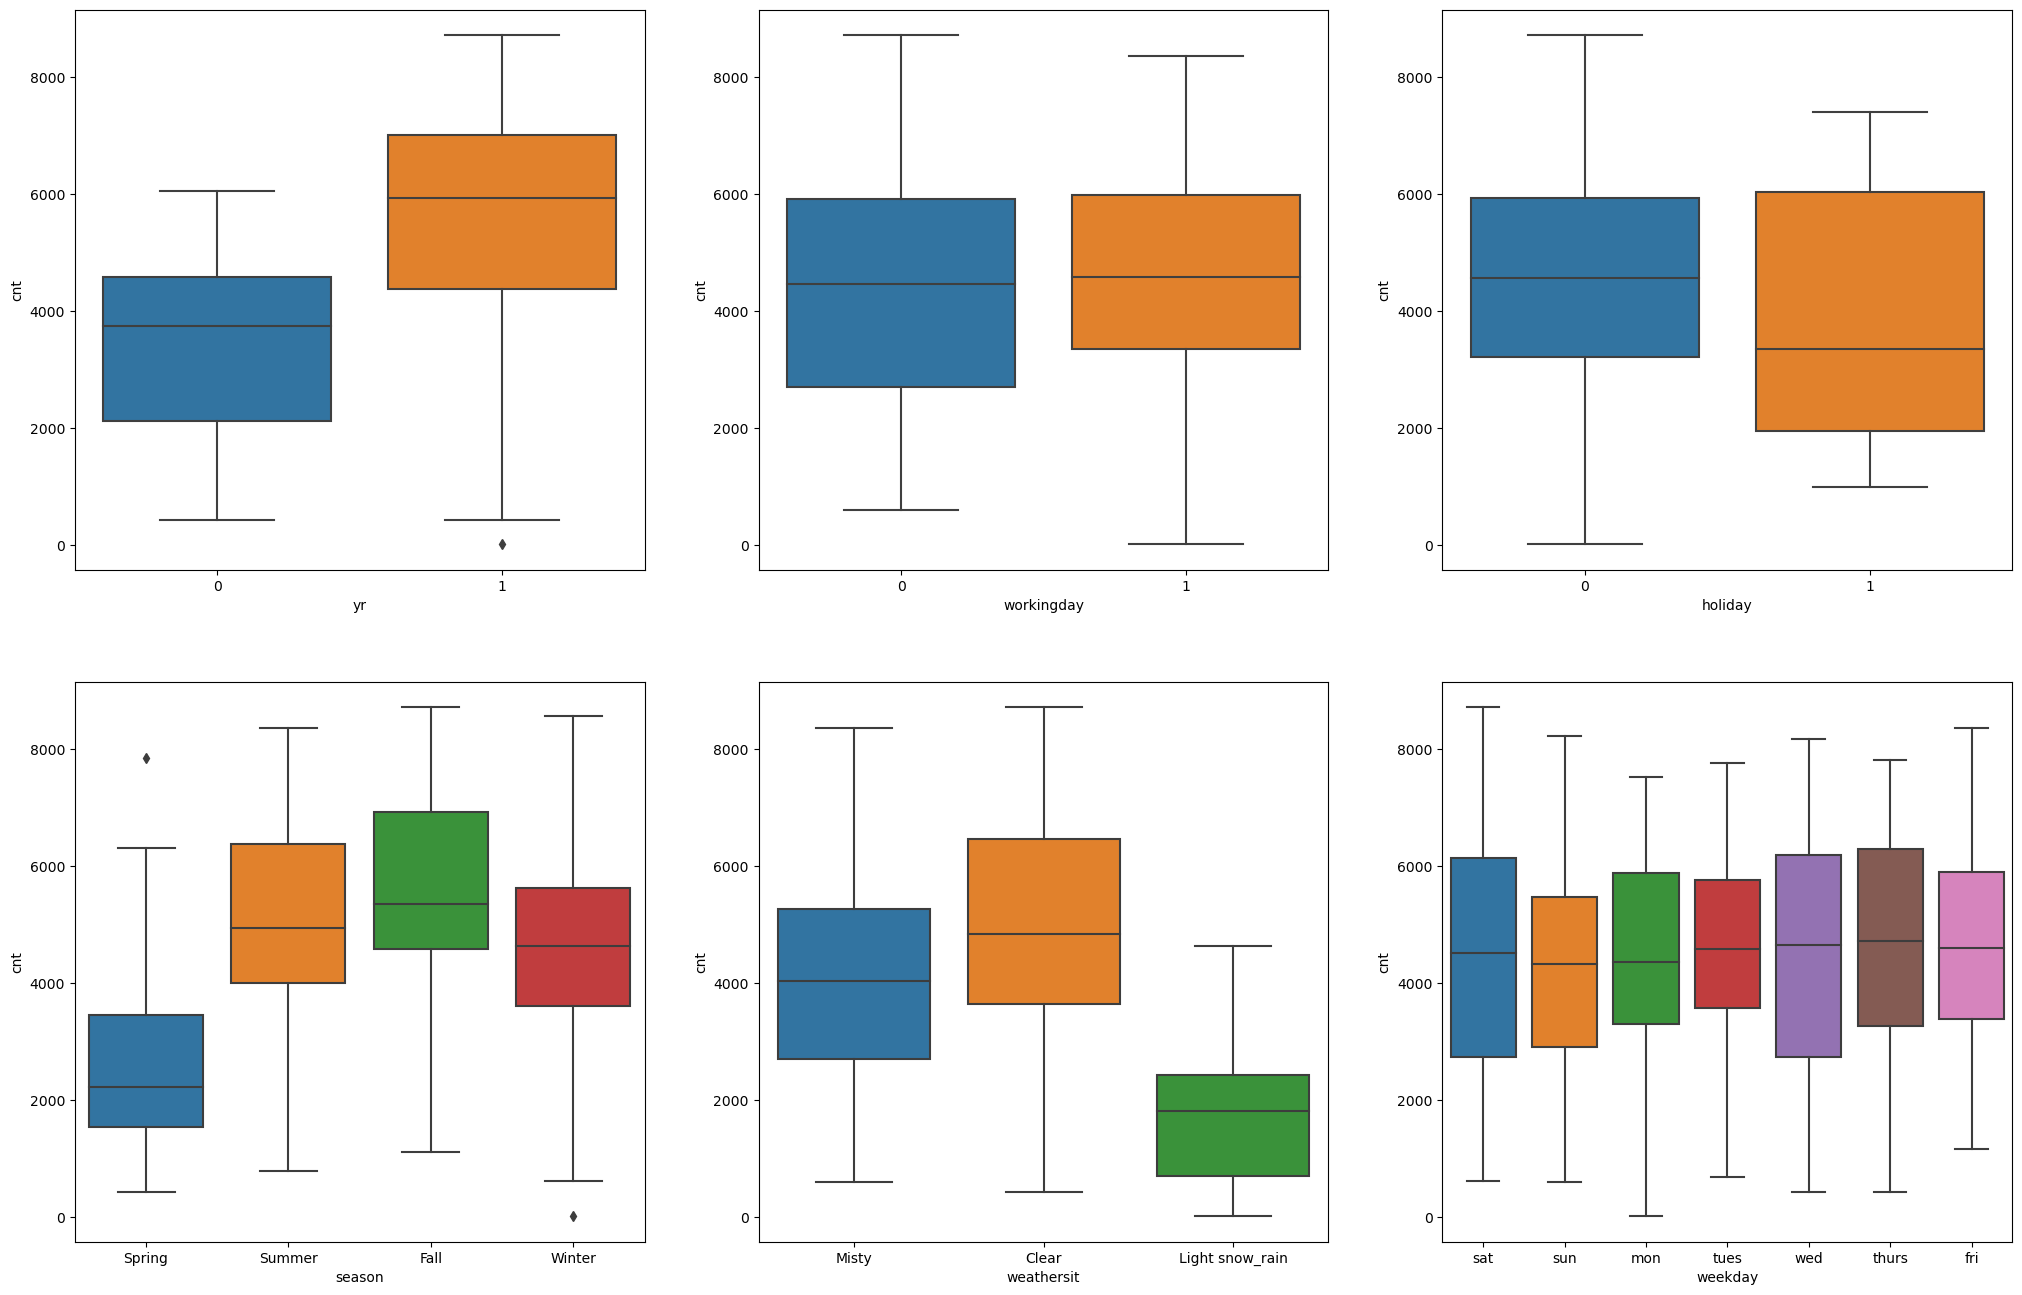

In [11]:
#visualizing the categorical variables of the dataset using boxplot 
cat_vars = ['yr','workingday','holiday','season','weathersit','weekday']
plot_categorical_vars(cat_vars, 'cnt')

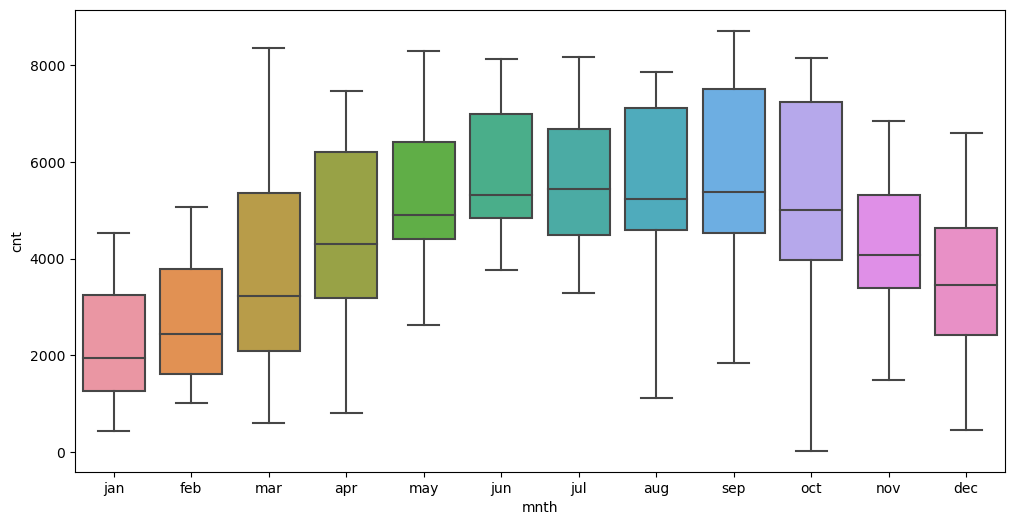

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'mnth', y='cnt', data = bikeset)
plt.show()

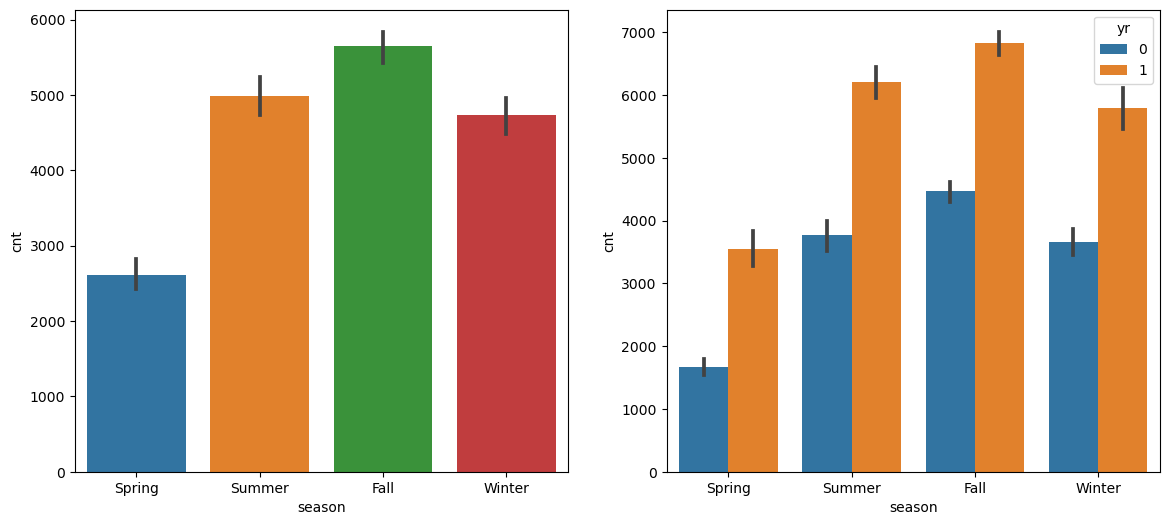

In [13]:
analyse_cat_vars('season',14,6)

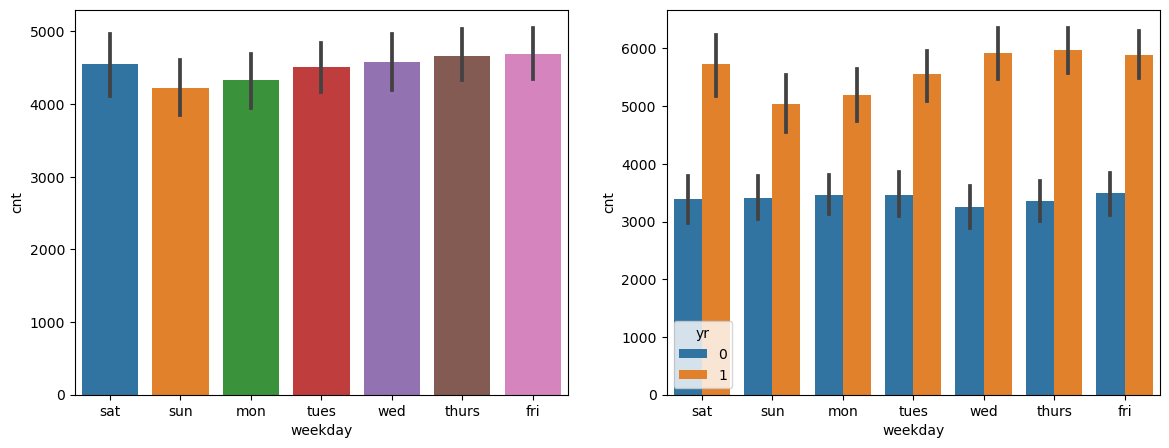

In [14]:
analyse_cat_vars('weekday',14,5)

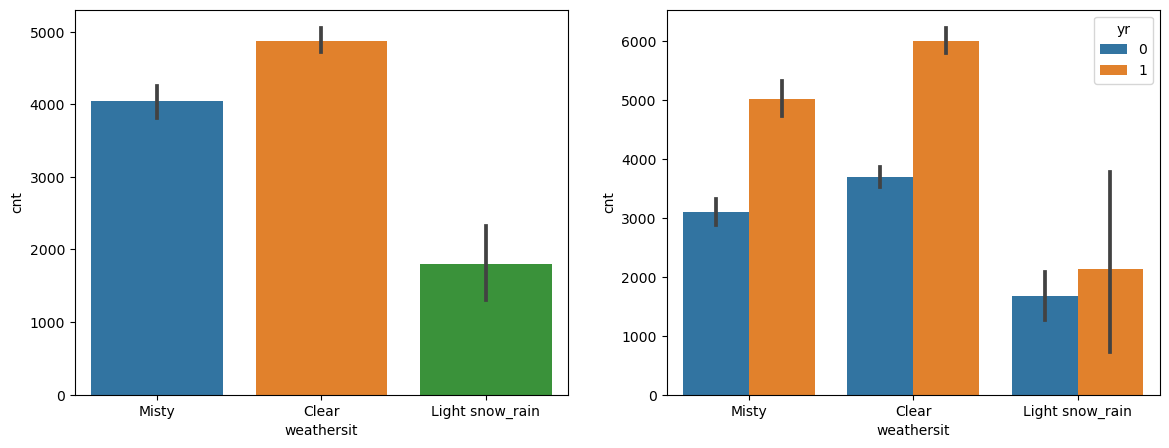

In [15]:
analyse_cat_vars('weathersit',14,5)

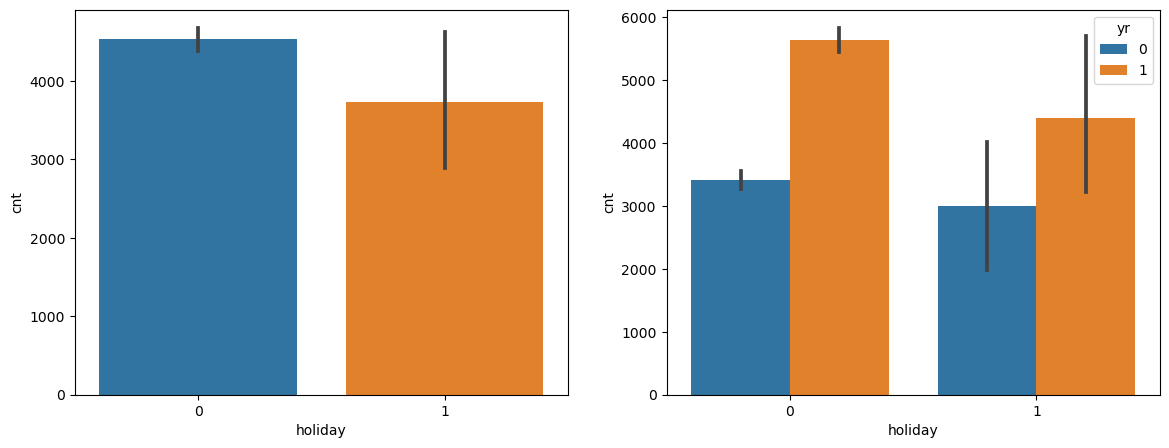

In [16]:
analyse_cat_vars('holiday',14,5)

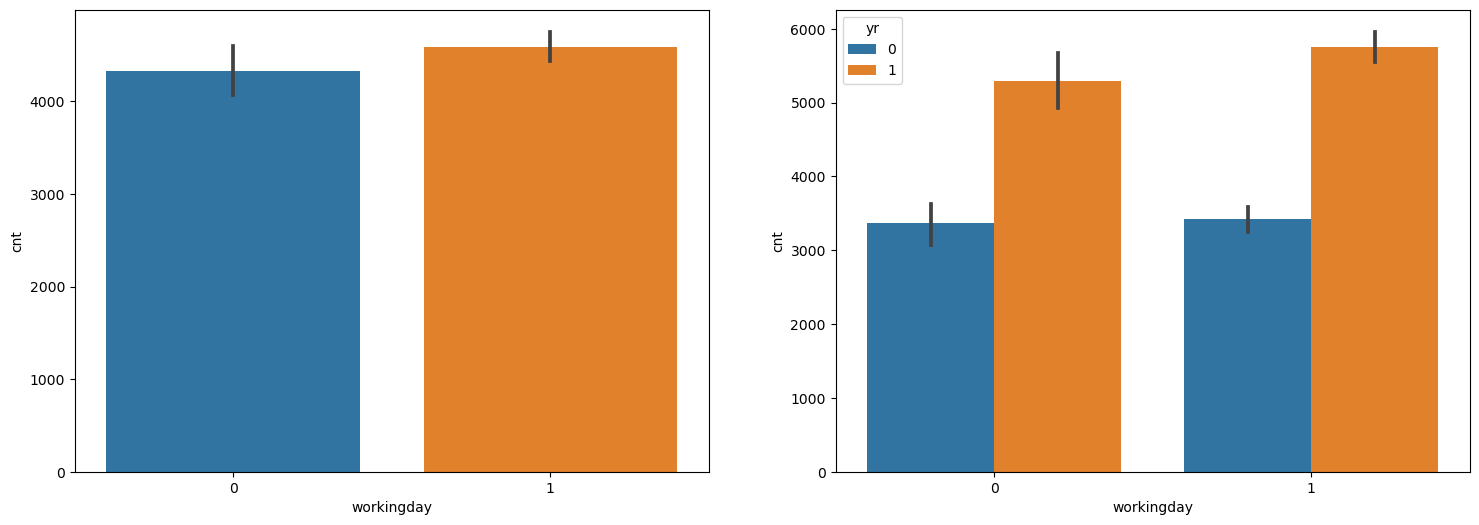

In [17]:
analyse_cat_vars('workingday',18,6)

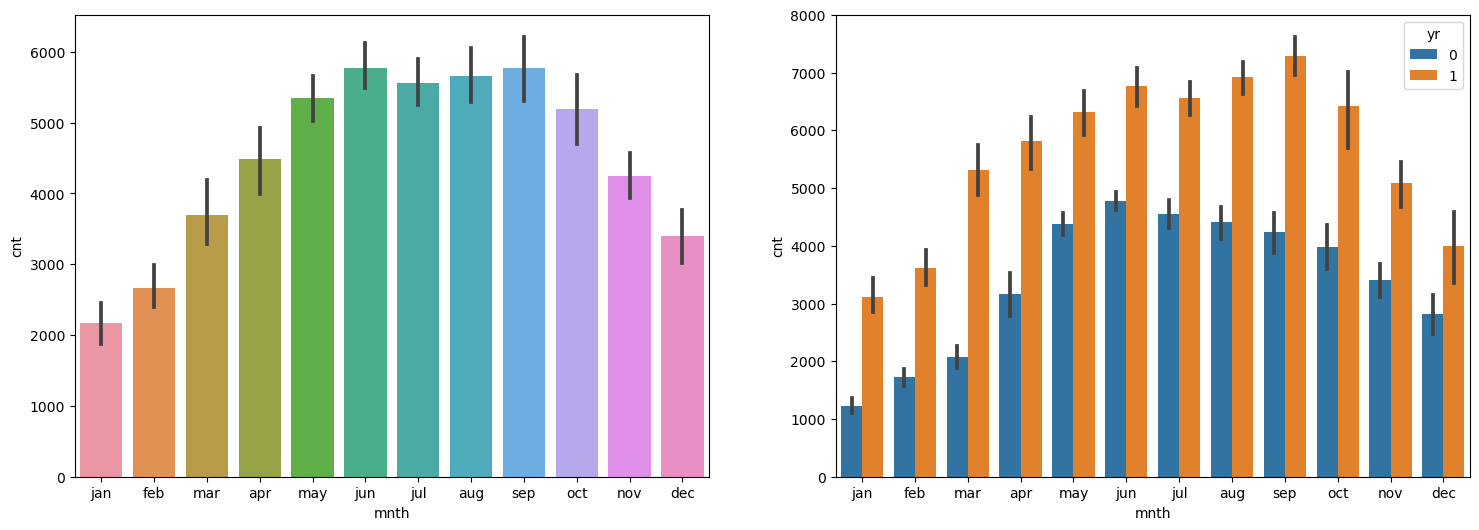

In [18]:
analyse_cat_vars('mnth',18,6)

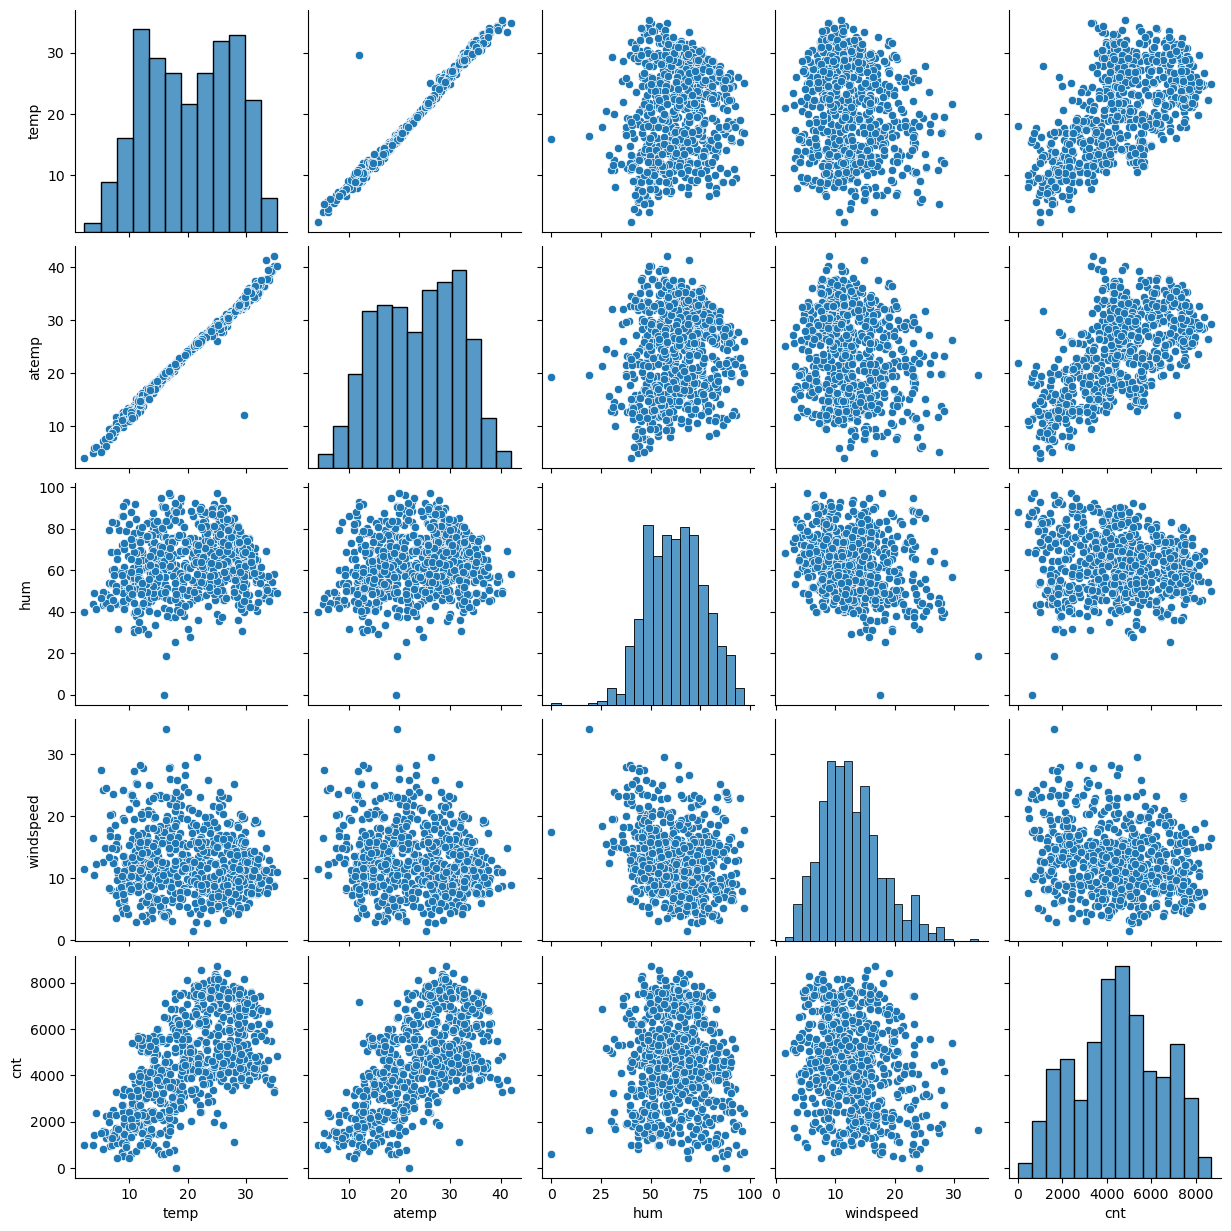

In [19]:
# Visualising all numeric variables with help of scatter diagram
num_vars = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(bikeset[num_vars])
plt.show()

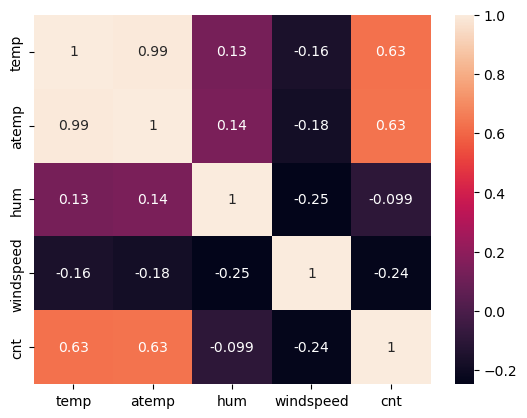

In [20]:
#making a heatmap to showcase correlation between the variables and decide whether we can perform linear regression on the dataset

sns.heatmap(bikeset[num_vars].corr(), annot = True)
plt.show()

In [21]:
#As temp and atemp are almost correlated, dropping atemp from dataset
bikeset.drop(['atemp'], axis = 1, inplace=True)

bikeset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,Spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,Spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,jan,0,tues,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


### Create Dummy Variable

In [22]:
#creating dummy variables for the variables of month, weekday, weathersit, seasons
month = pd.get_dummies(bikeset.mnth, drop_first=True,dtype='int')
weekday = pd.get_dummies(bikeset.weekday, drop_first=True,dtype='int')
weathersit = pd.get_dummies(bikeset['weathersit'], drop_first=True,dtype='int')
season = pd.get_dummies(bikeset['season'], drop_first=True,dtype='int')

In [23]:
bikeset.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,Spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,Spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,jan,0,tues,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


In [24]:
#adding the dummy variables to the original dataframe
bikeset = pd.concat([bikeset,month, weekday, weathersit, season], axis=1)
bikeset.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,sat,sun,thurs,tues,wed,Light snow_rain,Misty,Spring,Summer,Winter
0,Spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,Spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,Spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,jan,0,tues,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,Spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [25]:
# dropping the variables season,mnth,weekday,weathersit as we have created the dummies for it
bikeset.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bikeset.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thurs,tues,wed,Light snow_rain,Misty,Spring,Summer,Winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7,0,0,0,6.765000,53.5833,17.875868,959,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8,0,0,0,5.671653,43.4167,24.250650,822,0,0,0,...,0,1,0,0,0,0,0,1,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,0,0,0,...,0,0,0,0,0,0,0,1,0,0


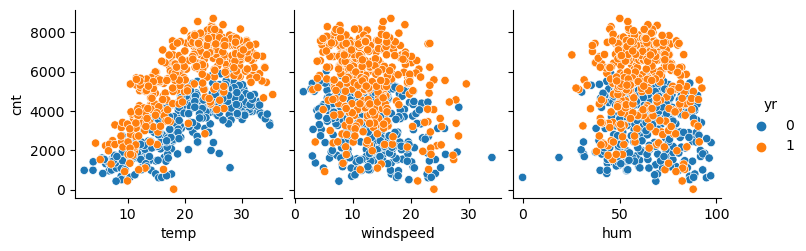

In [26]:
# Visualization of Relationship of Numerical Features against Target Variable
sns.pairplot(bikeset, x_vars=["temp", 'windspeed',"hum"],y_vars=['cnt'],hue ='yr')
plt.show()

# **Splitting into train and test**

In [27]:
# Splitting the Data into Training and Testing Sets
df_train,df_test = train_test_split(bikeset,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


# Scaling

Performing min-max scaling to Normalisie the data and handling the outliers

In [28]:
# As we saw that Data is not uniform across the all the Features hence Scaling is Required.
scaler = MinMaxScaler()

# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed',"hum",'cnt']

# For the Training Data Fit and Transform both need to done.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513499,0.224421,0.0,0.356420,0.518638,0.684710,1.0
aug,510.0,0.096078,0.294988,0.0,0.000000,0.000000,0.000000,1.0
dec,510.0,0.084314,0.278131,0.0,0.000000,0.000000,0.000000,1.0
feb,510.0,0.066667,0.249689,0.0,0.000000,0.000000,0.000000,1.0


We can see MinMax Scaling has been done properly for the Training Data as the Minimum value is 0 for each of the Feature and Maximum value is 1 for each of the Feature

# **Step 3: Training the model on train and test data**

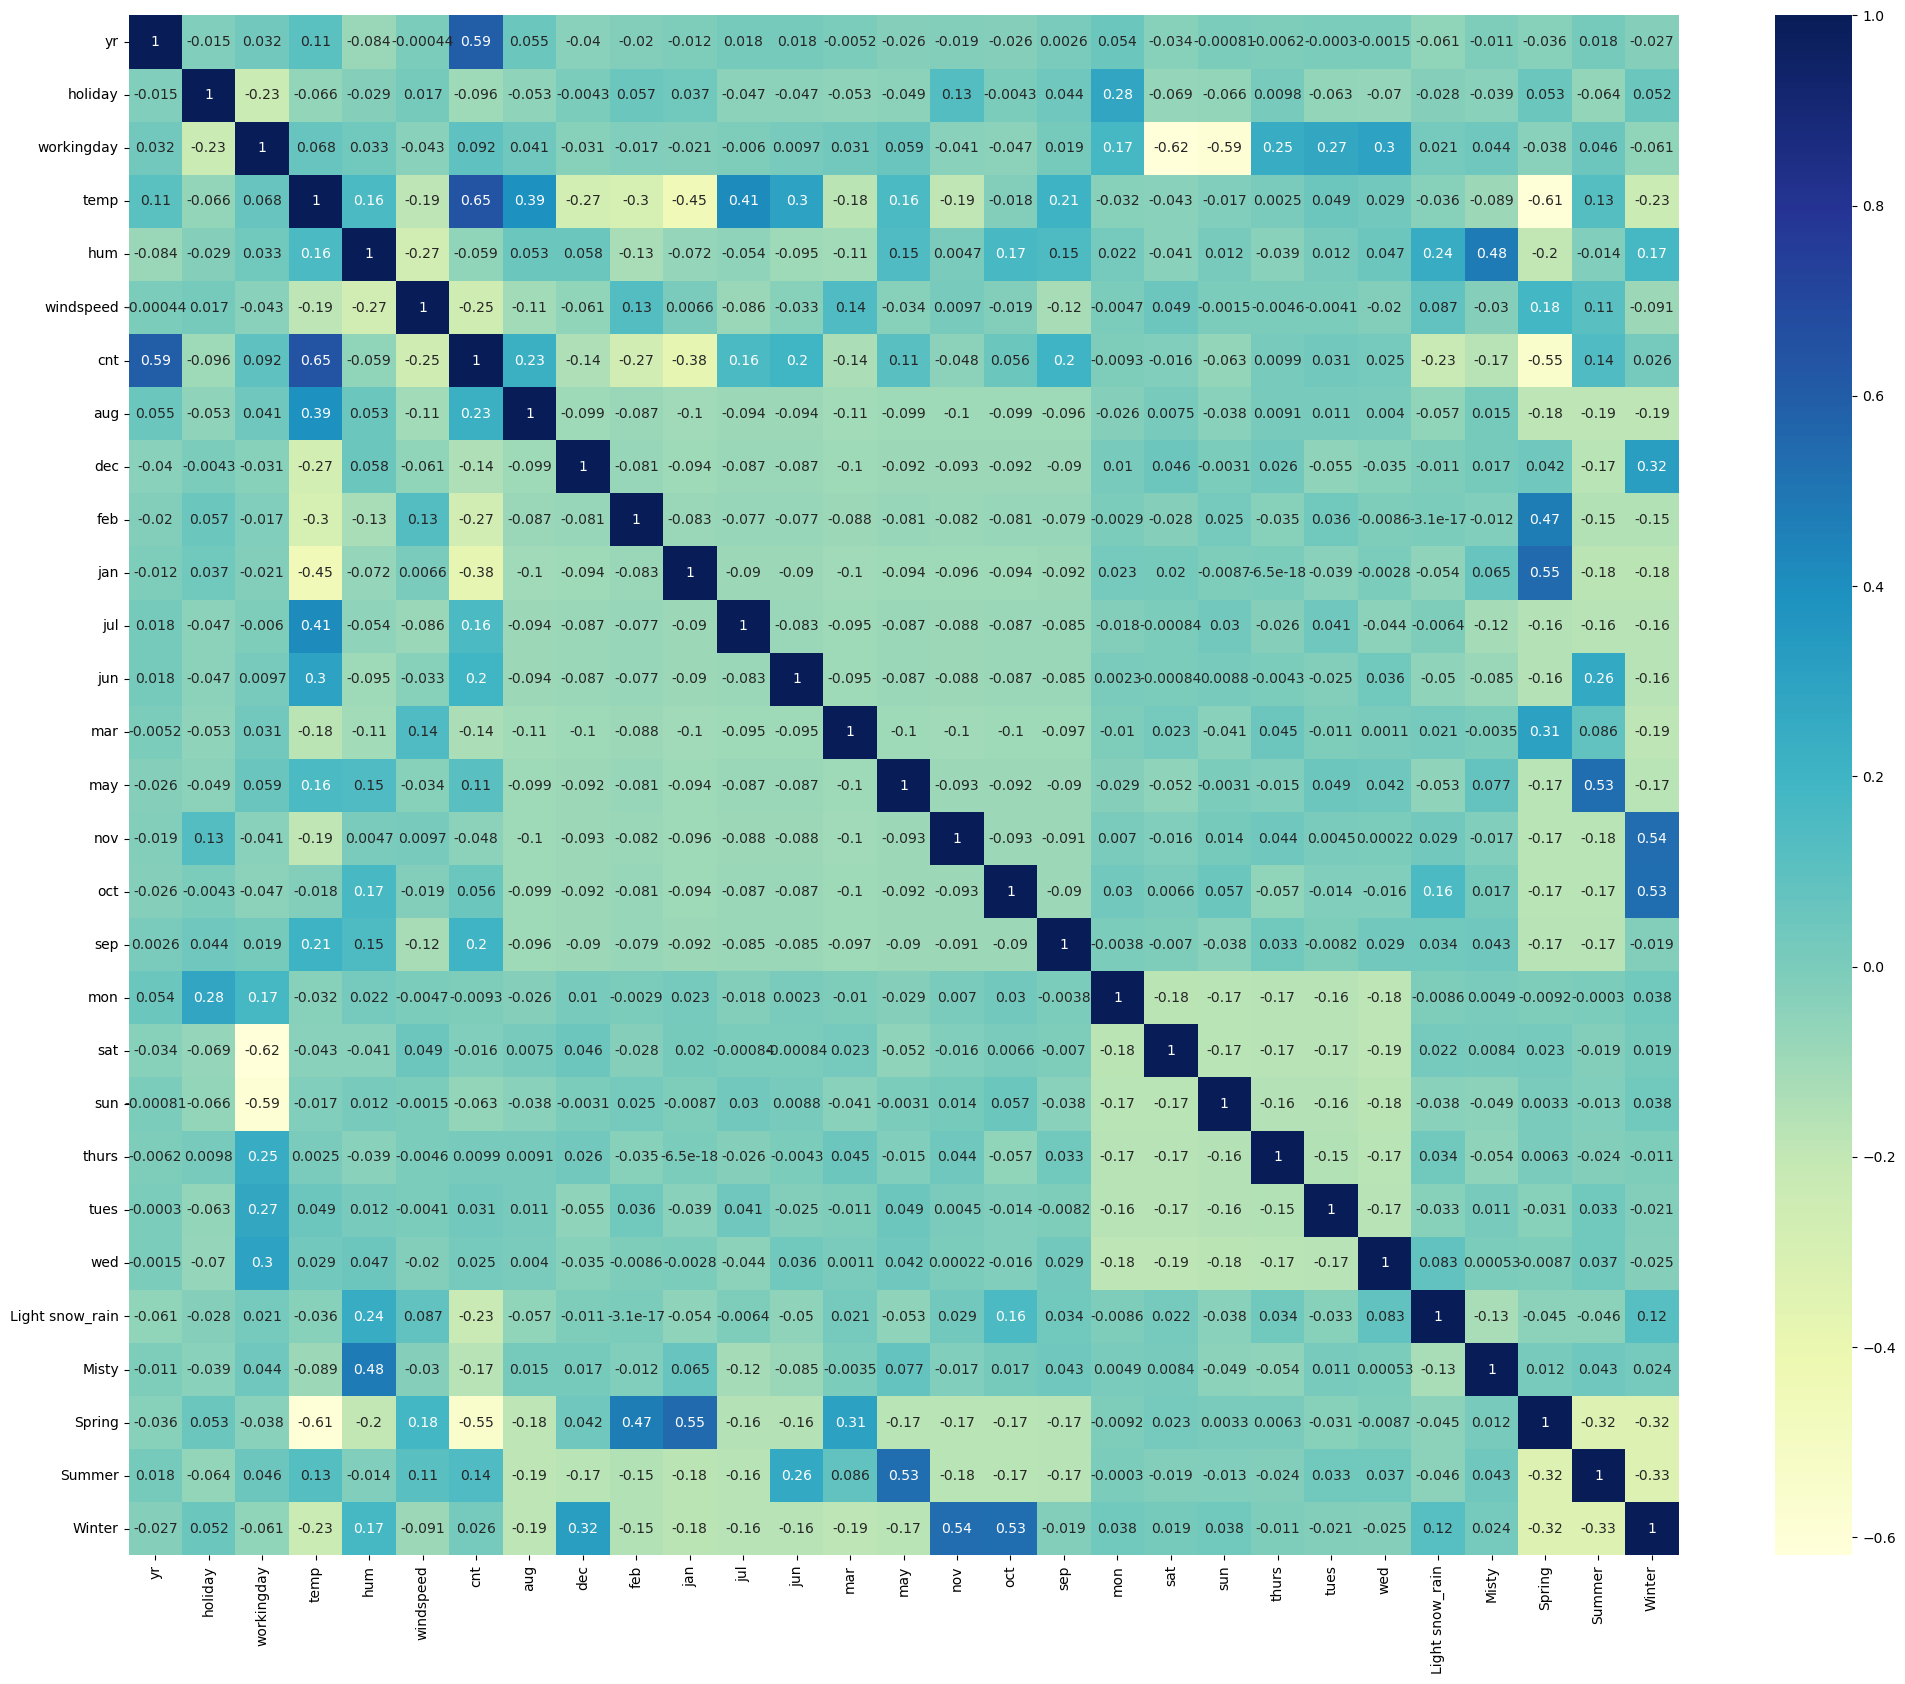

In [29]:
# checking correlation between variables by plotting heatmap

plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [30]:
# Preparation of Training Dataset and assigning X-Train and y_train
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
y_train.sample(5)

(510, 28)


403    0.319834
347    0.427750
162    0.510584
10     0.142775
309    0.417280
Name: cnt, dtype: float64

### Feature Selection using RFE(Recursive Feature Elimination)

In [31]:
# Running RFE with the Output Number of variables equals to 15
lm = LinearRegression()
lm.fit(X_train,y_train)
# Running RFE
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [32]:
# #checking the elements selected and the ones rejected in a list after rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 7),
 ('thurs', False, 10),
 ('tues', False, 9),
 ('wed', False, 11),
 ('Light snow_rain', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [33]:
#getting the selected feature variables in one one variable
true_rfe = X_train.columns[rfe.support_]

In [34]:
#checking the values of true_rfe
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan', 'jul',
       'sep', 'sat', 'Light snow_rain', 'Misty', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [35]:
len(true_rfe)

15

In [36]:
# Features Rejected by the RFE
X_train.columns[~(rfe.support_)]

Index(['aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon', 'sun',
       'thurs', 'tues', 'wed'],
      dtype='object')

### Model Building


In [37]:
#building model using selected RFE variables
#creating training set with RFE selected variables
X_train_rfe = X_train[true_rfe]

In [38]:
#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.params

const              0.251893
yr                 0.230527
holiday           -0.058173
workingday         0.043335
temp               0.509619
hum               -0.156299
windspeed         -0.186259
jan               -0.034512
jul               -0.052918
sep                0.081395
sat                0.053552
Light snow_rain   -0.247464
Misty             -0.056318
Spring            -0.050897
Summer             0.050762
Winter             0.093301
dtype: float64

In [39]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.22e-191
Time:                        14:50:33   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.036      6.969      0.000       0.181       0.323
yr                  0.2305      0.008     28.795      0.000       0.215       0.246
holiday            -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday          0.0433      0.012      3.762      0.000       0.021       0.066
temp                0.5096      0.034     14.837      0.000       0.442       0.577
hum                -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed          -0.1863      0.025     -7.310      0.000      -0.236      -0.136
jan                -0.0345      0.017     -1.989      0.047      -0.069      -0.000
jul                -0.0529      0.018     -2.931      0.004      -0.088      -0.017
sep                 0.0814      0.016      4.945      0.000       0.049       0.114
sat                 0.0536      0.014      3.694      0.000       0.025       0.082
Light snow_rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Misty              -0.0563      0.010     -5.439      0.000      -0.077      -0.036
Spring             -0.0509      0.021     -2.464      0.014      -0.091      -0.010
Summer              0.0508      0.015      3.423      0.001       0.022       0.080
Winter              0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Calculating VIF

In [40]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif


,Features,VIF
0,const,84.60
13,Spring,5.08
4,temp,3.89
15,Winter,3.59
14,Summer,2.65
5,hum,1.91
3,workingday,1.88
10,sat,1.78
7,jan,1.57
12,Misty,1.57


In [41]:
#hum variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['Spring'], axis = 1)

In [42]:
#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.98e-191
Time:                        14:50:33   Log-Likelihood:                 516.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2011      0.030      6.739      0.000       0.142       0.260
yr                  0.2294      0.008     28.555      0.000       0.214       0.245
holiday            -0.0596      0.027     -2.206      0.028      -0.113      -0.007
workingday          0.0437      0.012      3.774      0.000       0.021       0.066
temp                0.5676      0.025     22.556      0.000       0.518       0.617
hum                -0.1659      0.037     -4.446      0.000      -0.239      -0.093
windspeed          -0.1935      0.025     -7.606      0.000      -0.243      -0.144
jan                -0.0393      0.017     -2.271      0.024      -0.073      -0.005
jul                -0.0442      0.018     -2.486      0.013      -0.079      -0.009
sep                 0.0928      0.016      5.847      0.000       0.062       0.124
sat                 0.0539      0.015      3.696      0.000       0.025       0.082
Light snow_rain    -0.2433      0.026     -9.320      0.000      -0.295      -0.192
Misty              -0.0541      0.010     -5.221      0.000      -0.075      -0.034
Summer              0.0757      0.011      6.950      0.000       0.054       0.097
Winter              0.1255      0.011     11.081      0.000       0.103       0.148
==============================================================================
Omnibus:                       60.708   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.130
Skew:                          -0.660   Prob(JB):                     3.35e-29
Kurtosis:                       5.104   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif


,Features,VIF
0,const,57.07
4,temp,2.07
5,hum,1.89
3,workingday,1.88
10,sat,1.78
12,Misty,1.56
7,jan,1.55
14,Winter,1.53
8,jul,1.43
13,Summer,1.41


### We have Prob(F-statistic) is very low Which tells Overall model is a good Fit.

### We got quite Good Adjusted R2 Score i.e 84.2%

### All the P Value are less than 0.05, Which say that all the 14 Features are Statistically Significant

### Hence we can go ahead with the current Model for Prediction and Evaluation.

## Residual Analysis

### Looking for Normal Distribution

In [44]:
#getting the y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr1)

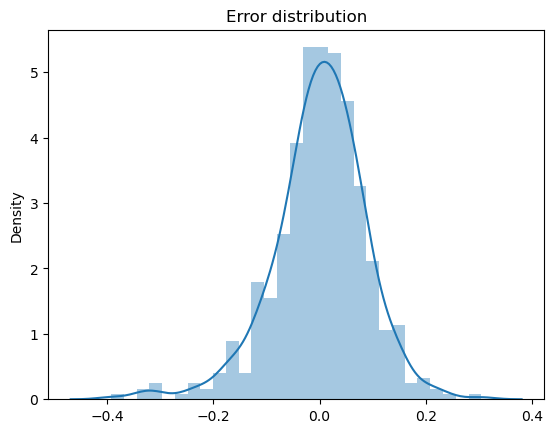

In [45]:
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.title('Error distribution')
plt.show()

### We can see Error Terms are normally Distributed with mean Zero. Hence Model is Actaully obeying the assumption of Normality.

### Looking for Constant Variance

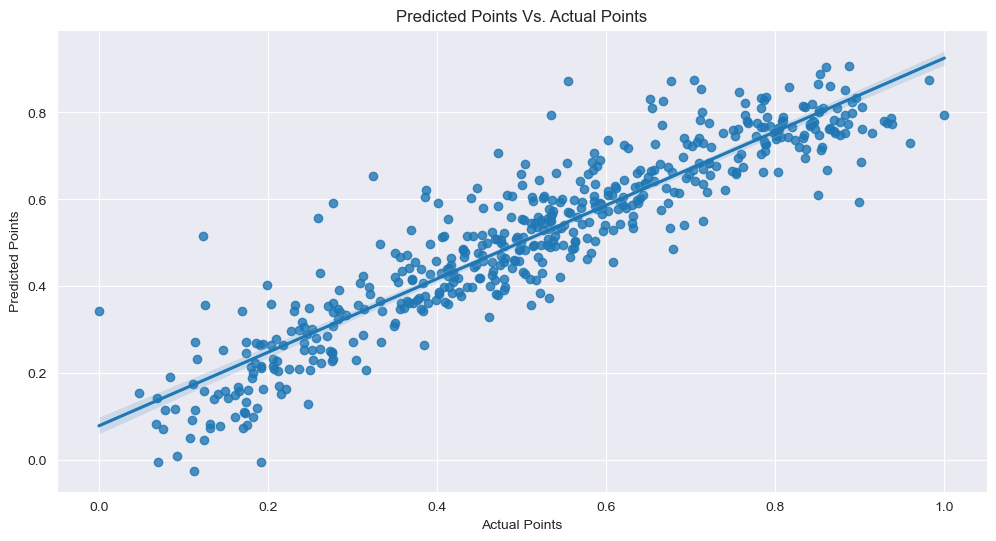

In [58]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

### We can see Error Terms have approximatly a Constant Variance, Hence it follows the Assumption of Homoscedasticity

##  patterns in the residuals

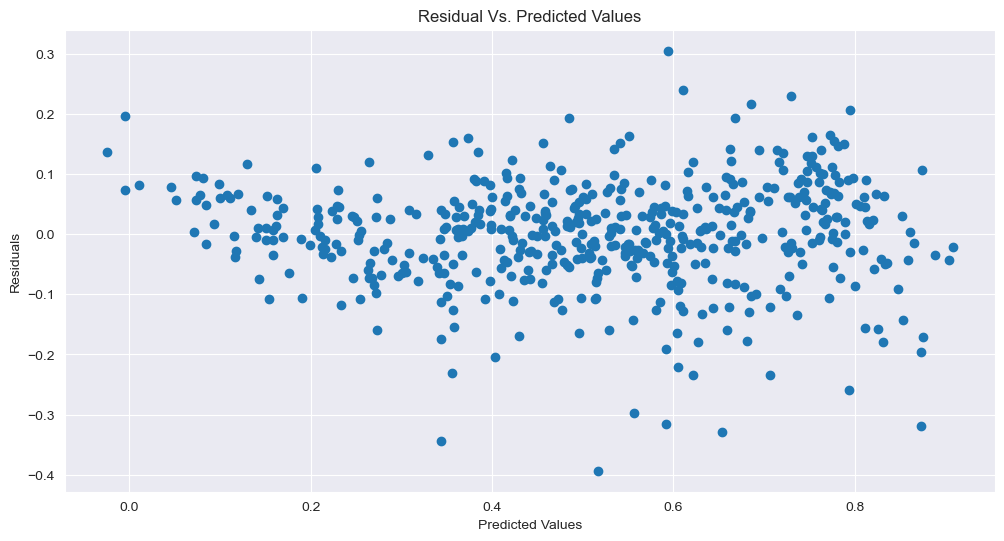

In [62]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### We can see there is no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say Error terms are independent of each other.

### Model Evaluation on Test Dataset

#### Applying the MinMax scaling on the test sets

In [46]:
num_vars = ['temp', 'windspeed','hum','cnt']

df_test[num_vars]=scaler.transform(df_test[num_vars])

y_test = df_test.pop('cnt')
X_test = df_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()


,const,yr,holiday,workingday,temp,hum,windspeed,aug,dec,feb,...,sat,sun,thurs,tues,wed,Light snow_rain,Misty,Spring,Summer,Winter
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [47]:
#checking the values
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [48]:
#Printing feature variables

X_train_lr1.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'jan', 'jul', 'sep', 'sat', 'Light snow_rain', 'Misty', 'Summer',
       'Winter'],
      dtype='object')

In [49]:
#dropping constant
X_train_lr1.drop(columns= 'const', inplace = True)

In [50]:
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr1.columns]

#adding a constant variable"
X_test_new = sm.add_constant(X_test_new)
X_test_new.shape

(220, 15)

In [51]:
#making predictions

y_pred = lr_model.predict(X_test_new)


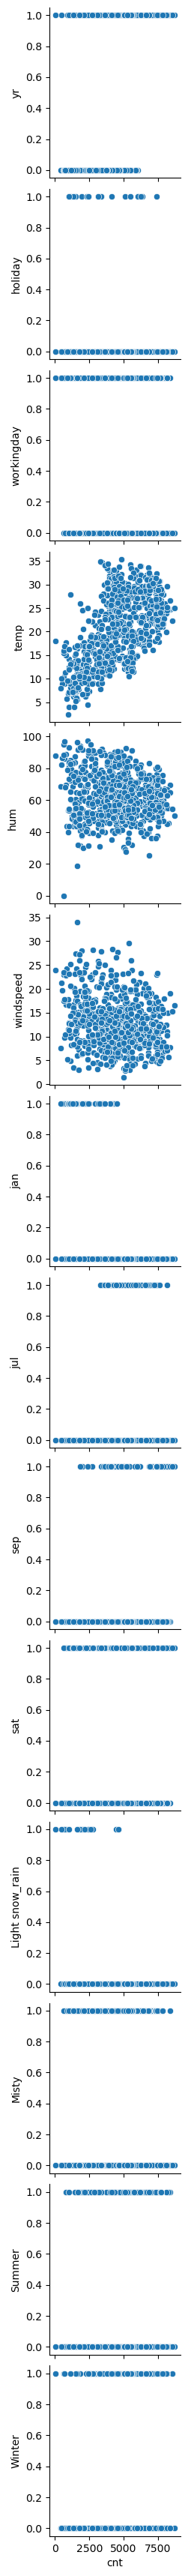

<Figure size 1600x1200 with 0 Axes>

In [53]:
#build a scatter plot to observe relationship between the dependent and the feature variables

sns.pairplot(bikeset, y_vars=X_train_lr1.columns, x_vars='cnt')
plt.figure(figsize = (16, 12))
plt.show()

In [54]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.8053484636863371


In [55]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.8463471899540171


### The Final Model accuray is around 80.5%, Which is a Good Score.

### The Model accuracy difference between the Train and Test Data is less than 4% which is acceptable.

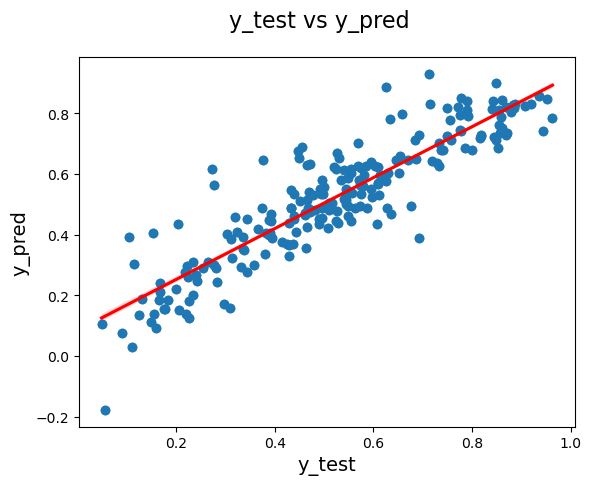

In [56]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

In [57]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.0077235069408645675
Mean squared error of the test set is 0.009307122963858877


In [65]:
Cofficients = round(lr_model.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp               0.57
yr                 0.23
const              0.20
Winter             0.13
sep                0.09
Summer             0.08
sat                0.05
workingday         0.04
jan               -0.04
jul               -0.04
Misty             -0.05
holiday           -0.06
hum               -0.17
windspeed         -0.19
Light snow_rain   -0.24
dtype: float64

## Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets

Summary:
The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

The R-squared value of the train set is 84.63% whereas the test set has a value of 80.53% which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model.

Our developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set. The p-values and VIF were used to select the significant variables. RFE was also conducted for automated selection of variables.

We can conclude that the bike demands for the BoomBikes is company is dependent on the temperature and whether it is a workingday or not. Additionally more rentals seem to be demanded on the fall and summer as compared to the winter and spring. We had observed that the months from June to September had higher use of rentals.

These interpretations help us derive meaningful insights in the bike rental market and the behaviour of the people. One of the recommendations based on this model are that there should be aggressive marketing in the summer and fall season to drive up rentals. Since the summer months also show low rental levels, a strong marketing strategy for the first 6 months of the year can assist in driving up the rental numbers. There has to be an approach required to introduce more users on days where the weather is less clear, perhaps with incentives or strategic deals. Rentals were more in 2019 than 2018 which suggests that over time more people would be exposed to this idea and there has to a strong analysis done to retain the repeat customers.